### Week4
#### 用2707晶華做範例，簡單示範詞頻、文字雲
### 1. 讀取財務報表
#### 利用轉檔網頁將PDF轉成TXT
#### (https://pdfcandy.com/tw/extract-text.html)
#### 讀入txt檔(2707晶華)

In [1]:
data = open("Pages from 1504 2017 東元.txt", "r", encoding="utf-8")
data2= data.readlines()

In [2]:
data2

['\n',
 '\n',
 '   \n',
 '\n',
 '- 113 -   \n',
 '\n',
 '  \n',
 '東元電機股份有限公司  \n',
 '個 體 財 務 報 表 附 註  \n',
 '型型   \n',
 '單位：新台幣仟元 \n',
 '校 \n',
 '一、公司沿革  \n',
 '董致 災\n',
 '設立。主要經營之業務為：各種機械設備 致董董董\n',
 '機械、電器及視聽電子產品、有線及無線 董\n',
 '災型董\n',
 '機股份有限公司為消滅公司。另本公司於民國 董致\n',
 '及東台科技股份有限公司合併，本公司為 董致\n',
 '東台科技股份有限公司為消滅公司。 \n',
 '二、通過財務報告之日期及程序  \n',
 '致 \n',
 '三、新發布及修訂準則及解釋之適用  \n',
 '災致  \n',
 '國際財務報導準則之影響  \n',
 '適用之國際財務報導準則之新發布、修\n',
 '正及修訂之準則及解釋：  \n',
 '  \n',
 '\n',
 ' 新發布/修正/修訂準則及解釋 \n',
 '致災 \n',
 '發布之生效日 \n',
 '董 董致董\n',
 '正「投資個體：適用合 併報表之例外規定」 \n',
 '民國105年1月1日\n',
 '國際財務報導準則第1 修正「取得聯合營運權益之會計\n',
 '處理」 \n',
 '民國105年1月1日\n',
 '國際財務報導準則第14號「管制遞 延帳戶」\n',
 '國際會計準則第1號之修正「 揭露倡議」\n',
 '致董\n',
 '法之闡釋」 \n',
 '民國105年1月1日\n',
 '國際會計準則第16號及第41號之修正「農 業：生產性植物」\n',
 '國際會計準則第19號之修正「確定福利計 畫：員工提撥金」\n',
 '國際會計準則第27號之修正「單獨財務報 表之權益法」\n',
 '國際會計準則第36號之修正「非金融資產 可回收金額之揭露」\n',
 '致董致致災致校檢致\n',
 '之持續適用」 \n',
 '民國103年1月1日\n',
 '國際財務報導解釋第21號「 公課」\n',
 '2010-2012週期之年度改善\n',
 '\n',
 '   \n',
 '\n',
 '- 114 -   \n',
 

#### 移除空白

In [3]:
for i in range(len(data2)):
    data2[i] = data2[i].strip()

In [4]:
for i in range(len(data2)):
    data2[i] = data2[i].replace(" ", "")

In [5]:
for i in data2:
    if "" in data2:
        data2.remove("")

In [6]:
data2

['-113-',
 '東元電機股份有限公司',
 '個體財務報表附註',
 '型型',
 '單位：新台幣仟元',
 '校',
 '一、公司沿革',
 '董致災',
 '設立。主要經營之業務為：各種機械設備致董董董',
 '機械、電器及視聽電子產品、有線及無線董',
 '災型董',
 '機股份有限公司為消滅公司。另本公司於民國董致',
 '及東台科技股份有限公司合併，本公司為董致',
 '東台科技股份有限公司為消滅公司。',
 '二、通過財務報告之日期及程序',
 '致',
 '三、新發布及修訂準則及解釋之適用',
 '災致',
 '國際財務報導準則之影響',
 '適用之國際財務報導準則之新發布、修',
 '正及修訂之準則及解釋：',
 '新發布/修正/修訂準則及解釋',
 '致災',
 '發布之生效日',
 '董董致董',
 '正「投資個體：適用合併報表之例外規定」',
 '民國105年1月1日',
 '國際財務報導準則第1修正「取得聯合營運權益之會計',
 '處理」',
 '民國105年1月1日',
 '國際財務報導準則第14號「管制遞延帳戶」',
 '國際會計準則第1號之修正「揭露倡議」',
 '致董',
 '法之闡釋」',
 '民國105年1月1日',
 '國際會計準則第16號及第41號之修正「農業：生產性植物」',
 '國際會計準則第19號之修正「確定福利計畫：員工提撥金」',
 '國際會計準則第27號之修正「單獨財務報表之權益法」',
 '國際會計準則第36號之修正「非金融資產可回收金額之揭露」',
 '致董致致災致校檢致',
 '之持續適用」',
 '民國103年1月1日',
 '國際財務報導解釋第21號「公課」',
 '2010-2012週期之年度改善',
 '-114-',
 '本公司經評估上述準則及解釋對本公司財務狀檢校災致',
 '災發布、修正後國際財務報導準則之影響',
 '適用之國際財務報導準則之新發布、修',
 '正及修訂之準則及解釋：',
 '除下列所述者外，本公司經評估上述準則及解釋對本公司財務狀況與財務',
 '績效並無重大影響：',
 '董災',
 '企業作不可撤銷之選擇將非交易目的之校災致災',
 '他綜合損益。',
 '債表日評估該工具之信用風險是否有顯著增加',
 '型董致型董',
 '致檢致型型型致型',
 '型致致檢',

#### 整理格式

In [7]:
data3 = "，"
data3 = data3.join(data2)
data3

'-113-，東元電機股份有限公司，個體財務報表附註，型型，單位：新台幣仟元，校，一、公司沿革，董致災，設立。主要經營之業務為：各種機械設備致董董董，機械、電器及視聽電子產品、有線及無線董，災型董，機股份有限公司為消滅公司。另本公司於民國董致，及東台科技股份有限公司合併，本公司為董致，東台科技股份有限公司為消滅公司。，二、通過財務報告之日期及程序，致，三、新發布及修訂準則及解釋之適用，災致，國際財務報導準則之影響，適用之國際財務報導準則之新發布、修，正及修訂之準則及解釋：，新發布/修正/修訂準則及解釋，致災，發布之生效日，董董致董，正「投資個體：適用合併報表之例外規定」，民國105年1月1日，國際財務報導準則第1修正「取得聯合營運權益之會計，處理」，民國105年1月1日，國際財務報導準則第14號「管制遞延帳戶」，國際會計準則第1號之修正「揭露倡議」，致董，法之闡釋」，民國105年1月1日，國際會計準則第16號及第41號之修正「農業：生產性植物」，國際會計準則第19號之修正「確定福利計畫：員工提撥金」，國際會計準則第27號之修正「單獨財務報表之權益法」，國際會計準則第36號之修正「非金融資產可回收金額之揭露」，致董致致災致校檢致，之持續適用」，民國103年1月1日，國際財務報導解釋第21號「公課」，2010-2012週期之年度改善，-114-，本公司經評估上述準則及解釋對本公司財務狀檢校災致，災發布、修正後國際財務報導準則之影響，適用之國際財務報導準則之新發布、修，正及修訂之準則及解釋：，除下列所述者外，本公司經評估上述準則及解釋對本公司財務狀況與財務，績效並無重大影響：，董災，企業作不可撤銷之選擇將非交易目的之校災致災，他綜合損益。，債表日評估該工具之信用風險是否有顯著增加，型董致型董，致檢致型型型致型，型致致檢，新發布/修正/修訂準則及解釋，致災，發布之生效日，2011-2013週期之年度改善，2012-2014週期之年度改善，新發布/修正/修訂準則及解釋，國際會計準則理事會，發布之生效日，董致，量」，民國107年1月1日，董致董，『保險合約』下國際財務報導準則第9號『金融工具』之適用」，民國107年1月1日，國際財務報導準則第9號「金融工具」，國際財務報導準則第15號「客戶合約之收入」，致，『客戶合約之收入』之闡釋」，民國107年1月1日，國際會計準則第7號之修

### 2. 文字清洗
#### 載入套件
#### 記得先安裝worldcloud(https://github.com/amueller/word_cloud) 裡面也有教學說明
#### 記得先安裝jieba(https://github.com/fxsjy/jieba) 裡面也有教學說明

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import jieba
% matplotlib inline

#### 設定停止詞與標點符號
#### 排除許多冗字的出現干擾，例如：的、我、你、嗎，以及標點符號等等
#### 這些字可以統稱稱之為停止詞 (stopword)，而一般在進行文字探勘時都會預先將這些字詞剔除

In [9]:
stopwords = ['我', '對', '\n']
puncs = '！？｡＂＃＄％＆＇（）＊＋，－／：；＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘’‛“”„‟…‧﹏.。'

In [10]:
seg_list = jieba.cut(data3, cut_all=False)  # 精确模式
print("Default Mode: " + "/ ".join(seg_list))

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\j2831\AppData\Local\Temp\jieba.cache
Loading model cost 0.713 seconds.
Prefix dict has been built succesfully.


Default Mode: -/ 113/ -/ ，/ 東元/ 電機/ 股份/ 有限公司/ ，/ 個體/ 財務/ 報表/ 附/ 註/ ，/ 型型/ ，/ 單位/ ：/ 新台幣/ 仟/ 元/ ，/ 校/ ，/ 一/ 、/ 公司/ 沿革/ ，/ 董致災/ ，/ 設/ 立/ 。/ 主要/ 經營/ 之業務為/ ：/ 各種/ 機械/ 設備/ 致董/ 董董/ ，/ 機械/ 、/ 電器/ 及視/ 聽/ 電子/ 產品/ 、/ 有線/ 及/ 無線/ 董/ ，/ 災型/ 董/ ，/ 機/ 股份/ 有限公司/ 為/ 消滅/ 公司/ 。/ 另本/ 公司/ 於/ 民國/ 董致/ ，/ 及/ 東台/ 科技股份/ 有限公司/ 合/ 併/ ，/ 本/ 公司/ 為/ 董致/ ，/ 東台/ 科技股份/ 有限公司/ 為/ 消滅/ 公司/ 。/ ，/ 二/ 、/ 通過/ 財務/ 報告/ 之/ 日期/ 及/ 程序/ ，/ 致/ ，/ 三/ 、/ 新/ 發布及/ 修訂/ 準則/ 及/ 解釋/ 之/ 適用/ ，/ 災致/ ，/ 國際/ 財務/ 報導/ 準則/ 之/ 影響/ ，/ 適用/ 之國際/ 財務/ 報導/ 準則/ 之/ 新/ 發布/ 、/ 修/ ，/ 正及/ 修訂/ 之/ 準則/ 及/ 解釋/ ：/ ，/ 新/ 發布/ // 修正/ // 修訂/ 準則/ 及/ 解釋/ ，/ 致災/ ，/ 發布/ 之/ 生效日/ ，/ 董董致/ 董/ ，/ 正/ 「/ 投資個體/ ：/ 適用合/ 併/ 報表/ 之/ 例/ 外規定/ 」/ ，/ 民國/ 105/ 年/ 1/ 月/ 1/ 日/ ，/ 國際/ 財務/ 報導/ 準則/ 第/ 1/ 修正/ 「/ 取得/ 聯/ 合營/ 運權/ 益/ 之會計/ ，/ 處/ 理/ 」/ ，/ 民國/ 105/ 年/ 1/ 月/ 1/ 日/ ，/ 國際/ 財務/ 報導/ 準則/ 第/ 14/ 號/ 「/ 管制/ 遞延/ 帳戶/ 」/ ，/ 國際會計/ 準則/ 第/ 1/ 號之/ 修正/ 「/ 揭/ 露/ 倡議/ 」/ ，/ 致董/ ，/ 法/ 之/ 闡釋/ 」/ ，/ 民國/ 105/ 年/ 1/ 月/ 1/ 日/ ，/ 國際會計/ 準則/ 第/ 16/ 號/ 及第/ 41/ 號之/ 修正/ 「/ 農業/ ：/ 生產性/ 植物/ 」/ ，/ 國際會計/ 準則/ 第/ 19/ 號之/ 修正/

In [11]:
seg_list = jieba.cut(data3, cut_all=False)
seg_list = list(seg_list)
wordDict = {}
for w in seg_list:
    if (w not in stopwords) and (w not in puncs):
        if w in wordDict:
            wordDict[w] = wordDict[w] + 1
        else:
            wordDict[w] = 1
print(wordDict)

{'-': 198, '113': 2, '東元': 13, '電機': 5, '股份': 16, '有限公司': 14, '個體': 7, '財務': 44, '報表': 3, '附': 5, '註': 9, '型型': 16, '單位': 5, '新台幣': 24, '仟': 1, '元': 6, '校': 14, '一': 7, '公司': 131, '沿革': 1, '董致災': 6, '設': 4, '立': 10, '主要': 11, '經營': 5, '之業務為': 1, '各種': 1, '機械': 2, '設備': 16, '致董': 9, '董董': 22, '電器': 1, '及視': 1, '聽': 1, '電子': 1, '產品': 3, '有線': 1, '及': 97, '無線': 1, '董': 83, '災型': 27, '機': 2, '為': 60, '消滅': 2, '另本': 1, '於': 99, '民國': 22, '董致': 53, '東台': 2, '科技股份': 2, '合': 3, '併': 7, '本': 77, '二': 3, '通過': 3, '報告': 9, '之': 361, '日期': 1, '程序': 1, '致': 61, '三': 4, '新': 11, '發布及': 1, '修訂': 8, '準則': 40, '解釋': 14, '適用': 18, '災致': 40, '國際': 17, '報導': 20, '影響': 33, '之國際': 2, '發布': 12, '修': 2, '正及': 2, '/': 47, '修正': 16, '致災': 15, '生效日': 4, '董董致': 1, '正': 1, '投資個體': 1, '適用合': 1, '例': 22, '外規定': 1, '105': 88, '年': 219, '1': 106, '月': 120, '日': 117, '第': 23, '取得': 19, '聯': 33, '合營': 1, '運權': 1, '益': 163, '之會計': 2, '處': 6, '理': 39, '14': 3, '號': 10, '管制': 1, '遞延': 18, '帳戶': 4, '國際會計': 13, '號之': 7, '揭':

### 3. 文字雲視覺化
#### 載入套件
#### 記得先安裝wordcloud (https://github.com/amueller/word_cloud) 裡面也有教學說明
#### wordcloud不支援中文字體，可先上網下載 (https://github.com/Halfish/lstm-ctc-ocr/blob/master/fonts/simfang.ttf) 

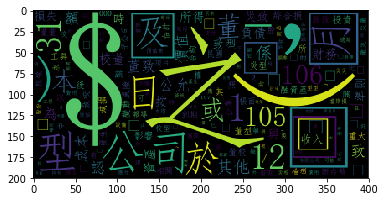

In [12]:
font = r"C:/Users/j2831/Desktop/simfang.ttf"
wordcloud = WordCloud(font_path=font)
wordcloud.fit_words(wordDict)
plt.imshow(wordcloud)

### 清理的不乾淨，再回頭清一次

In [13]:
stopwords = ['我', '對', '\n',"之","及","型","的","為","年", "月","於", "或", "致","係","日","與","000","年度"]
puncs = '！？｡＂＃＄％＆＇（）＊＋，－／：；＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘’‛“”„‟…‧﹏.。()$%,◎.0123456789~'
seg_list = jieba.cut(data3, cut_all=False)  # 精确模式
print("Default Mode: " + "/ ".join(seg_list))

Default Mode: -/ 113/ -/ ，/ 東元/ 電機/ 股份/ 有限公司/ ，/ 個體/ 財務/ 報表/ 附/ 註/ ，/ 型型/ ，/ 單位/ ：/ 新台幣/ 仟/ 元/ ，/ 校/ ，/ 一/ 、/ 公司/ 沿革/ ，/ 董致災/ ，/ 設/ 立/ 。/ 主要/ 經營/ 之業務為/ ：/ 各種/ 機械/ 設備/ 致董/ 董董/ ，/ 機械/ 、/ 電器/ 及視/ 聽/ 電子/ 產品/ 、/ 有線/ 及/ 無線/ 董/ ，/ 災型/ 董/ ，/ 機/ 股份/ 有限公司/ 為/ 消滅/ 公司/ 。/ 另本/ 公司/ 於/ 民國/ 董致/ ，/ 及/ 東台/ 科技股份/ 有限公司/ 合/ 併/ ，/ 本/ 公司/ 為/ 董致/ ，/ 東台/ 科技股份/ 有限公司/ 為/ 消滅/ 公司/ 。/ ，/ 二/ 、/ 通過/ 財務/ 報告/ 之/ 日期/ 及/ 程序/ ，/ 致/ ，/ 三/ 、/ 新/ 發布及/ 修訂/ 準則/ 及/ 解釋/ 之/ 適用/ ，/ 災致/ ，/ 國際/ 財務/ 報導/ 準則/ 之/ 影響/ ，/ 適用/ 之國際/ 財務/ 報導/ 準則/ 之/ 新/ 發布/ 、/ 修/ ，/ 正及/ 修訂/ 之/ 準則/ 及/ 解釋/ ：/ ，/ 新/ 發布/ // 修正/ // 修訂/ 準則/ 及/ 解釋/ ，/ 致災/ ，/ 發布/ 之/ 生效日/ ，/ 董董致/ 董/ ，/ 正/ 「/ 投資個體/ ：/ 適用合/ 併/ 報表/ 之/ 例/ 外規定/ 」/ ，/ 民國/ 105/ 年/ 1/ 月/ 1/ 日/ ，/ 國際/ 財務/ 報導/ 準則/ 第/ 1/ 修正/ 「/ 取得/ 聯/ 合營/ 運權/ 益/ 之會計/ ，/ 處/ 理/ 」/ ，/ 民國/ 105/ 年/ 1/ 月/ 1/ 日/ ，/ 國際/ 財務/ 報導/ 準則/ 第/ 14/ 號/ 「/ 管制/ 遞延/ 帳戶/ 」/ ，/ 國際會計/ 準則/ 第/ 1/ 號之/ 修正/ 「/ 揭/ 露/ 倡議/ 」/ ，/ 致董/ ，/ 法/ 之/ 闡釋/ 」/ ，/ 民國/ 105/ 年/ 1/ 月/ 1/ 日/ ，/ 國際會計/ 準則/ 第/ 16/ 號/ 及第/ 41/ 號之/ 修正/ 「/ 農業/ ：/ 生產性/ 植物/ 」/ ，/ 國際會計/ 準則/ 第/ 19/ 號之/ 修正/

In [14]:
seg_list = jieba.cut(data3, cut_all=False)
seg_list = list(seg_list)
wordDict = {}
for w in seg_list:
    if (w not in stopwords) and (w not in puncs):
        if w in wordDict:
            wordDict[w] = wordDict[w] + 1
        else:
            wordDict[w] = 1
print(wordDict)

{'-': 198, '113': 2, '東元': 13, '電機': 5, '股份': 16, '有限公司': 14, '個體': 7, '財務': 44, '報表': 3, '附': 5, '註': 9, '型型': 16, '單位': 5, '新台幣': 24, '仟': 1, '元': 6, '校': 14, '一': 7, '公司': 131, '沿革': 1, '董致災': 6, '設': 4, '立': 10, '主要': 11, '經營': 5, '之業務為': 1, '各種': 1, '機械': 2, '設備': 16, '致董': 9, '董董': 22, '電器': 1, '及視': 1, '聽': 1, '電子': 1, '產品': 3, '有線': 1, '無線': 1, '董': 83, '災型': 27, '機': 2, '消滅': 2, '另本': 1, '民國': 22, '董致': 53, '東台': 2, '科技股份': 2, '合': 3, '併': 7, '本': 77, '二': 3, '通過': 3, '報告': 9, '日期': 1, '程序': 1, '三': 4, '新': 11, '發布及': 1, '修訂': 8, '準則': 40, '解釋': 14, '適用': 18, '災致': 40, '國際': 17, '報導': 20, '影響': 33, '之國際': 2, '發布': 12, '修': 2, '正及': 2, '/': 47, '修正': 16, '致災': 15, '生效日': 4, '董董致': 1, '正': 1, '投資個體': 1, '適用合': 1, '例': 22, '外規定': 1, '105': 88, '年': 219, '第': 23, '取得': 19, '聯': 33, '合營': 1, '運權': 1, '益': 163, '之會計': 2, '處': 6, '理': 39, '14': 3, '號': 10, '管制': 1, '遞延': 18, '帳戶': 4, '國際會計': 13, '號之': 7, '揭': 8, '露': 10, '倡議': 2, '法': 15, '闡釋': 3, '16': 4, '及第': 1, '41': 3, '農業': 1, 

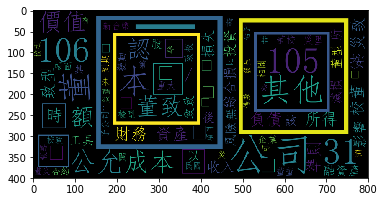

In [20]:
font = r"C:/Users/j2831/Desktop/simfang.ttf"
wordcloud = WordCloud(font_path=font, max_words=100, scale=2)
wordcloud.fit_words(wordDict)
plt.imshow(wordcloud)